# Análisis Exploratorio de Datos: Exploración de Datos Demográficos
Este notebook nos permitirá explorar los datos demográficos del estudio, provenientes del archivo PTDEMOG.csv (de ADNI).

## Objetivos del Análisis
Realizar una exploración inicial de los datos demográficos para entender:

1. ✅ Las variables disponibles (edad, sexo, etnia, educación, etc.).

2. ✅ Distribuciones estadísticas generales.

3. ✅ Composición de la cohorte.

4. ✅ Posibles valores faltantes o inconsistentes.

5. ✅ Cómo estas variables se podrían vincular a los otros tipos de datos (por ejemplo: biomarcadores, diagnóstico, etc.).

  
***

#### Importar Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno


#### Cargar el Archivo

In [3]:
# Ruta al archivo de datos demográficos
demog_path = "../data/raw/adni/demographics/PTDEMOG.csv"

# Cargar archivo
df_demog = pd.read_csv(demog_path)

print(f"✅ Dimensiones del dataset: {df_demog.shape}")
df_demog.head()


✅ Dimensiones del dataset: (5855, 84)


,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,PTSOURCE,PTGENDER,PTDOB,PTDOBYY,...,PTBIRPR,PTBIRGR,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
0,ADNI1,011_S_0002,2,sc,sc,2005-08-17,1.0,1.0,04/1931,1931.0,...,NaN,NaN,18,107,2005-08-17,NaN,NaN,NaN,NaN,2005-08-17 00:00:00.0
1,ADNI1,022_S_0001,1,f,f,2005-08-18,1.0,2.0,12/1944,1944.0,...,NaN,NaN,20,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
2,ADNI1,011_S_0003,3,sc,sc,2005-08-18,1.0,1.0,05/1924,1924.0,...,NaN,NaN,22,107,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
3,ADNI1,022_S_0004,4,sc,sc,2005-08-18,1.0,1.0,01/1938,1938.0,...,NaN,NaN,24,10,2005-08-18,NaN,NaN,NaN,NaN,2005-08-18 00:00:00.0
4,ADNI1,011_S_0005,5,sc,sc,2005-08-23,1.0,1.0,12/1931,1931.0,...,NaN,NaN,26,107,2005-08-23,NaN,NaN,NaN,NaN,2005-08-23 00:00:00.0


#### Exploración Inicial del Dataset

In [7]:
df_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 84 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 5855 non-null   object 
 1   PTID                  5855 non-null   object 
 2   RID                   5855 non-null   int64  
 3   VISCODE               5855 non-null   object 
 4   VISCODE2              5846 non-null   object 
 5   VISDATE               5848 non-null   object 
 6   PTSOURCE              5848 non-null   float64
 7   PTGENDER              5728 non-null   float64
 8   PTDOB                 5669 non-null   object 
 9   PTDOBYY               5669 non-null   float64
 10  PTHAND                5713 non-null   float64
 11  PTMARRY               5841 non-null   float64
 12  PTEDUCAT              5710 non-null   float64
 13  PTWORKHS              3528 non-null   float64
 14  PTWORK                979 non-null    float64
 15  PTNOTRT              

In [6]:
# Columnas
print("🔎 Columnas: ")
print(df_demog.columns.tolist())

# Estadísticas generales
df_demog.describe(include='all').T

🔎 Columnas: 
['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'PTSOURCE', 'PTGENDER', 'PTDOB', 'PTDOBYY', 'PTHAND', 'PTMARRY', 'PTEDUCAT', 'PTWORKHS', 'PTWORK', 'PTNOTRT', 'PTRTYR', 'PTHOME', 'PTTLANG', 'PTPLANG', 'PTADBEG', 'PTCOGBEG', 'PTADDX', 'PTETHCAT', 'PTRACCAT', 'PTIDENT', 'PTORIENT', 'PTORIENTOT', 'PTENGSPK', 'PTNLANG', 'PTENGSPKAGE', 'PTCLANG', 'PTLANGSP', 'PTLANGWR', 'PTSPTIM', 'PTSPOTTIM', 'PTLANGPR1', 'PTLANGSP1', 'PTLANGRD1', 'PTLANGWR1', 'PTLANGUN1', 'PTLANGPR2', 'PTLANGSP2', 'PTLANGRD2', 'PTLANGWR2', 'PTLANGUN2', 'PTLANGPR3', 'PTLANGSP3', 'PTLANGRD3', 'PTLANGWR3', 'PTLANGUN3', 'PTLANGPR4', 'PTLANGSP4', 'PTLANGRD4', 'PTLANGWR4', 'PTLANGUN4', 'PTLANGPR5', 'PTLANGSP5', 'PTLANGRD5', 'PTLANGWR5', 'PTLANGUN5', 'PTLANGPR6', 'PTLANGSP6', 'PTLANGRD6', 'PTLANGWR6', 'PTLANGUN6', 'PTLANGTTL', 'PTETHCATH', 'PTASIAN', 'PTOPI', 'PTBORN', 'PTBIRPL', 'PTIMMAGE', 'PTIMMWHY', 'PTBIRPR', 'PTBIRGR', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PHASE,5855,5,ADNI2,1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PTID,5855,4686,003_S_1122,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RID,5855.0,NaN,NaN,NaN,4107.25807,3140.461097,1.0,1023.0,4392.0,6421.5,10643.0
VISCODE,5855,29,sc,2493,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VISCODE2,5846,34,sc,4325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
USERDATE2,2697,1326,2025-02-26,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DD_CRF_VERSION_LABEL,989,1,v1,989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LANGUAGE_CODE,989,1,e,989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HAS_QC_ERROR,989.0,NaN,NaN,NaN,0.006067,0.077692,0.0,0.0,0.0,0.0,1.0


#### Visualizar Valores Faltantes

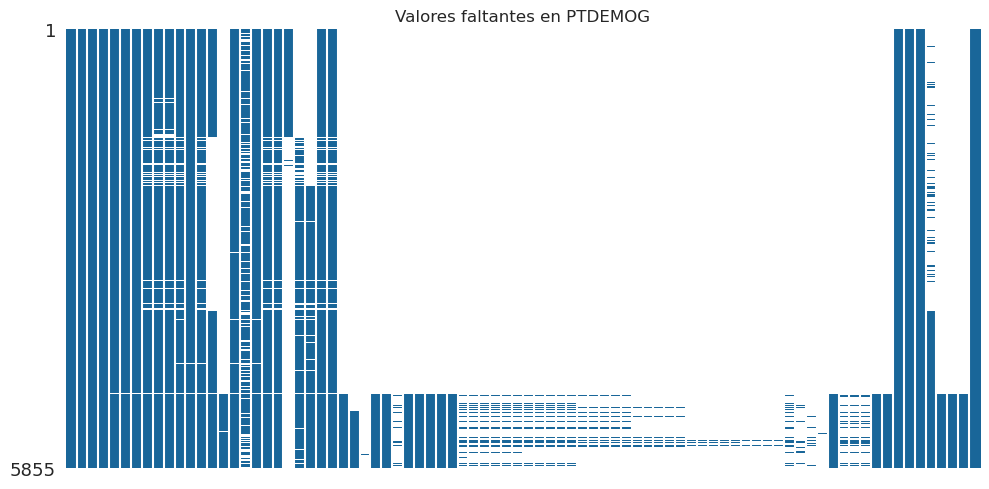

In [34]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'


msno.matrix(
    df_demog,
    figsize=(10, 5),
    color=(0.1, 0.4, 0.6),
    sparkline=False,
    fontsize=11,
)
plt.title("Valores faltantes en PTDEMOG")
plt.tight_layout()
plt.xticks(rotation=90, ha='right')  

# Guardar la imagen antes de mostrarla
#save_path = r"E:\usuarios\alumno\Escritorio\Alzheimer-Multimodal-Monitoring\reports\data\plots\missing_values_PTDEMOG.png"
#plt.savefig(save_path, dpi=300, bbox_inches='tight')  # Ajusta dpi y otros parámetros según necesites

plt.show()

#### Distribución de Variables Clave

Algunas columnas comunes que deberíamos encontrar son:

- RI: Identificador único del sujeto	
- PTID: ID del paciente (formato original)	
- PTGENDER: Género (Male/Female)	
- PTDOBYY: Año de nacimiento	
- PTETHCAT: Etnia (e.g., Not Hispanic, Hispanic)	
- PTRACCAT: Raza (White, Asian, Black, etc.)	
- PTEDUCAT: Años de educación	
- PTHAND: Mano dominante	
- PTMARRY: Estado civil	
- PTBORN: ¿Nacido en EE.UU.?	
- PTBIRPL: Lugar de nacimiento	
- PTIMMAGE: Edad de inmigración 
- SITEID: Centro clínico	Ú
- PTADBEG: Edad de inicio de Alzheimer 
- PTCOGBEG: Edad de inicio de deterioro cognitivo

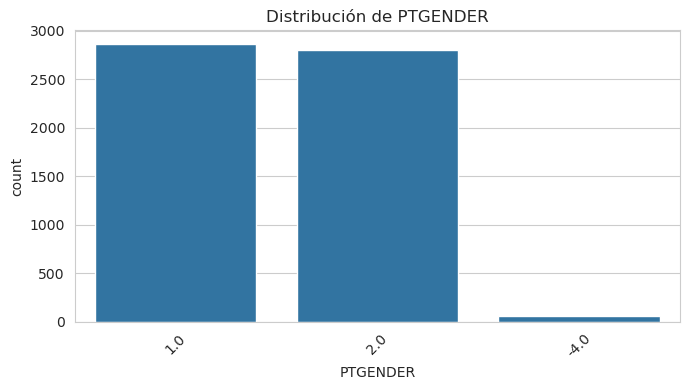

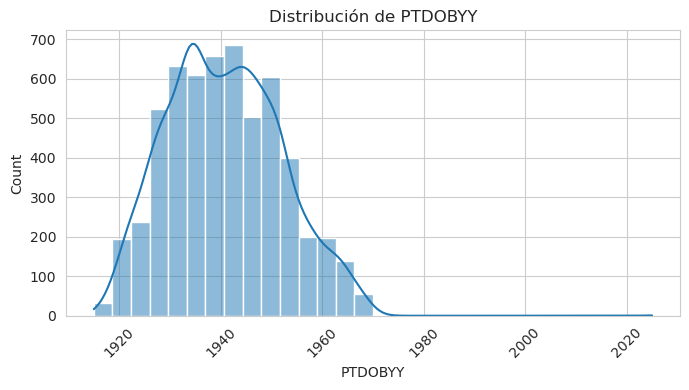

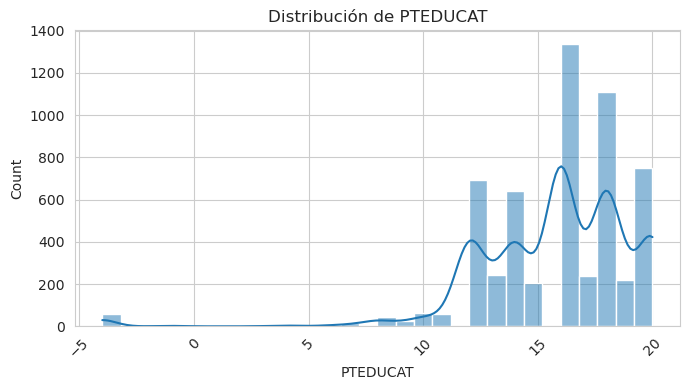

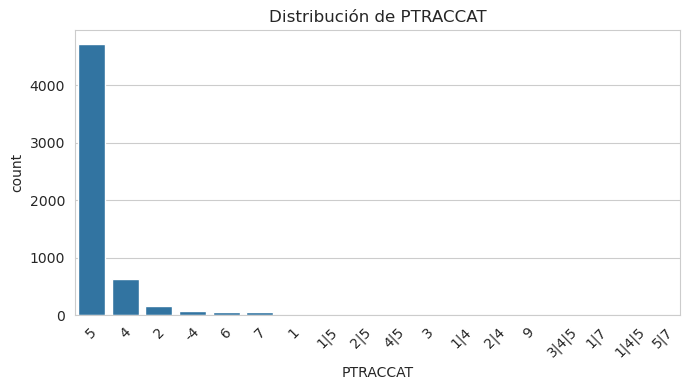

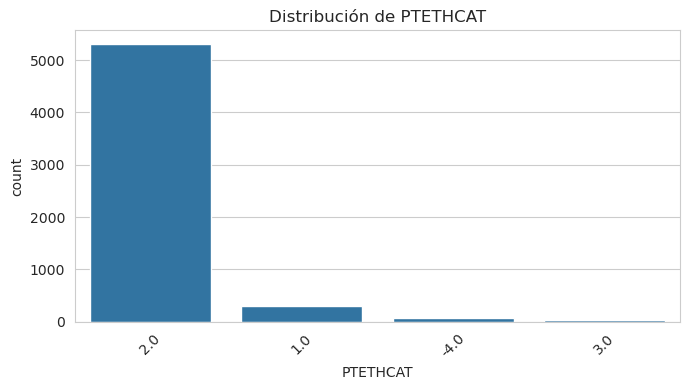

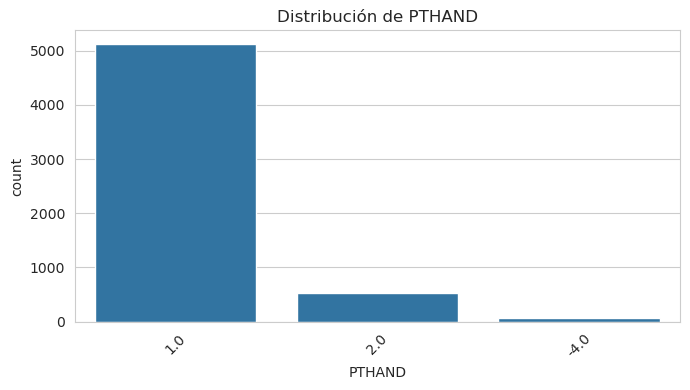

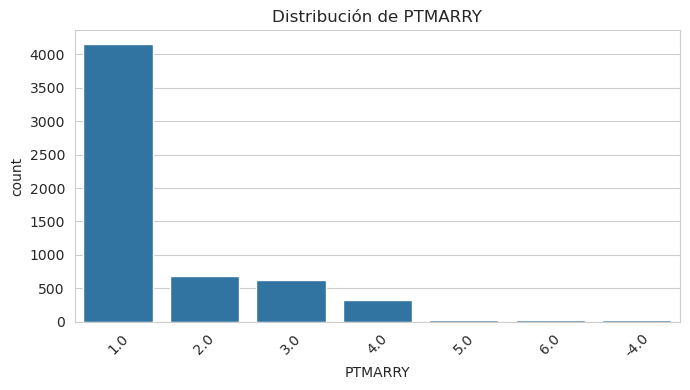

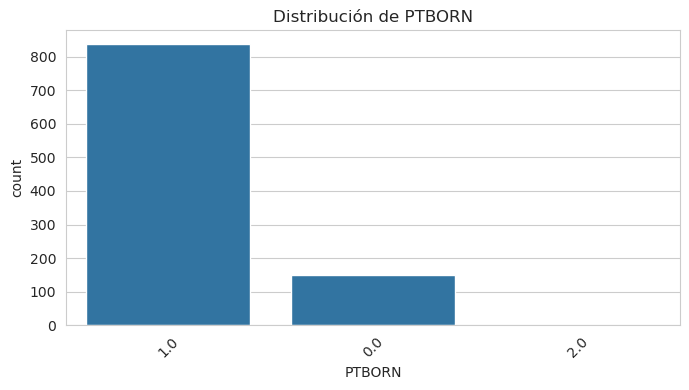

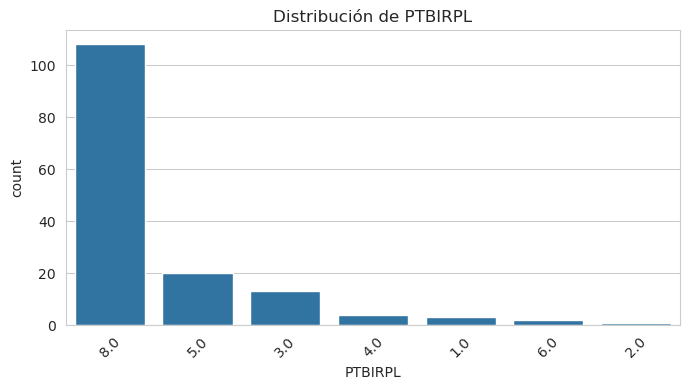

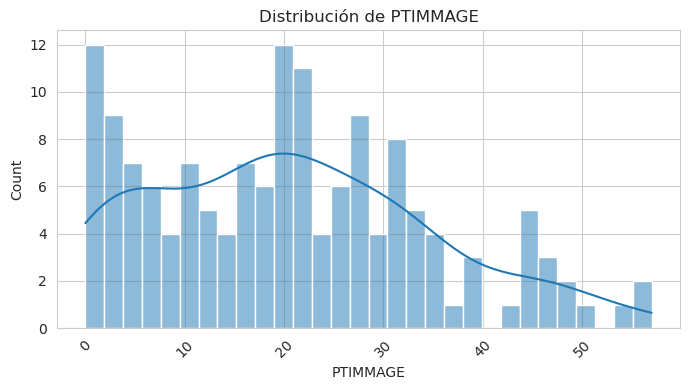

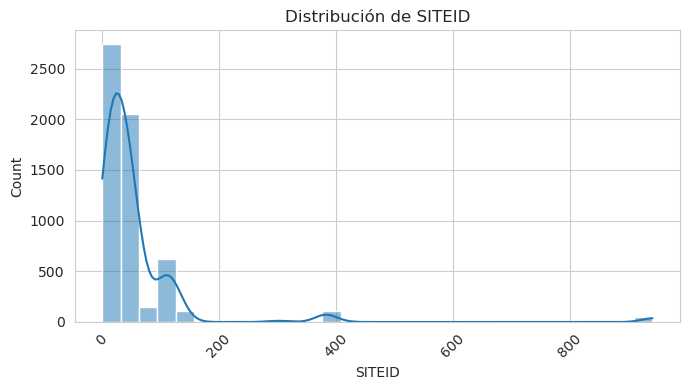

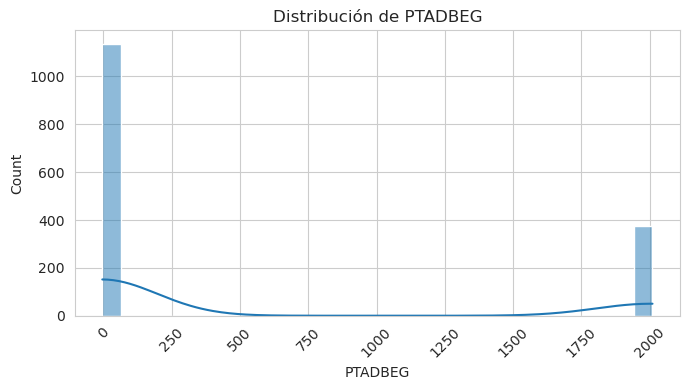

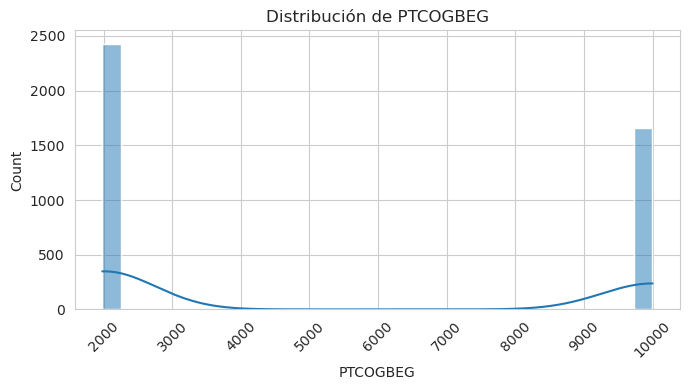

In [23]:
variables_clave = ['PTGENDER', 'PTDOBYY', 'PTEDUCAT',
                    'PTRACCAT', 'PTETHCAT', 'PTHAND', 'PTMARRY',
                    'PTBORN', 'PTBIRPL', 'PTIMMAGE', 'SITEID',
                    'PTADBEG', 'PTCOGBEG'
                  ]

for var in variables_clave:
    plt.figure(figsize=(7, 4))
    if df_demog[var].dtype == 'object' or df_demog[var].nunique() < 20:
        sns.countplot(data=df_demog, x=var, order=df_demog[var].value_counts().index)
    else:
        sns.histplot(data=df_demog, x=var, bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
  

#### Consistencia y Unicidad

In [46]:
# Revisar unicidad de IDs de sujetos
print("¿RID es único por sujeto?:", df_demog["RID"].is_unique)

# Revisar posibles duplicados
duplicados = df_demog[df_demog.duplicated(subset=["RID"], keep=False)]
print(f"👥 Duplicados por RID encontrados: {duplicados.shape[0]}")

¿RID es único por sujeto?: False
👥 Duplicados por RID encontrados: 1999


Lo más probable es que estos RID duplicados se den por que el conjunto de datos de ADNI, que es el que estamos utilizando, es un conjunto de datos longitudinal por ende habrá múltiples entradas por paciente.

#### Observaciones


- `RID` será clave para mergear con datos clínicos, biomarcadores y neuroimágenes.
- Edad, género, etnia y educación son útiles como covariables en análisis posteriores.
- Algunos valores faltantes deberán imputarse o manejarse antes del modelado.


#### Guardar Columnas Útiles para Futuros Cruces

In [47]:
cols_utiles = [
    'RID', 'PTGENDER', 'PTDOBYY', 'PTEDUCAT',
    'PTRACCAT', 'PTETHCAT', 'PTHAND', 'PTMARRY',
    'PTBORN', 'PTBIRPL', 'PTIMMAGE', 'SITEID',
    'PTADBEG', 'PTCOGBEG'
]

df_demog_reducido = df_demog[cols_utiles]
df_demog_reducido.to_csv('../data/interim/adni_demographics_clean.csv', index=False)
